In [1]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

# Generate randomized data set

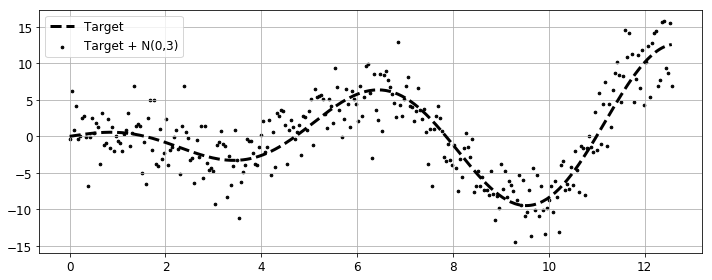

In [3]:
X=np.linspace(0,4*math.pi,300)

np.random.seed(99)
n=len(X)
Y=X*np.cos(X)+ np.random.normal(0,3,n)# 10*(np.random.random(n)-.5)
plt.scatter(X,Y,c="k",s=7,label="Target + N(0,3)")
plt.plot(X,X*np.cos(X),lw=3,ls="--",label="Target",c="k")
plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
fig.set_size_inches(10,4)
fig.tight_layout()
fig.savefig("smoothing-spline-target.pdf")

generate arbitrary knots

In [4]:
t1=[2,6,10]
t2=np.linspace(1,12,12)

In [5]:
from scipy.interpolate import LSQUnivariateSpline as LS
from scipy.interpolate import UnivariateSpline as US

# First, illustrate a single train/test split

In [6]:
n=len(X)
indices=list(range(n))
random.shuffle(indices)
ntrain=round(.75*n)
ntest=n-ntrain
training_indices=indices[:ntrain]
training_indices.sort()
test_indices=indices[ntrain:]
test_indices.sort()
XTRAIN=X[training_indices]
YTRAIN=Y[training_indices]
XTEST=X[test_indices]
YTEST=Y[test_indices]

## this line generates a fitting funtions
fit1=LS(XTRAIN,YTRAIN,t1)
fit2=LS(XTRAIN,YTRAIN,t2)
    ## this line generates predicted values using the fit functions
pred1=fit1(XTEST)
pred2=fit2(XTEST)

MSE1=sum((pred1-YTEST)**2)/ntest
MSE2=sum((pred2-YTEST)**2)/ntest

print("Mean Squared Error MSE1 =", MSE1)
print("Mean Squared Error MSE2 =", MSE2)

Mean Squared Error MSE1 = 12.010436863364362
Mean Squared Error MSE2 = 9.627397690423216


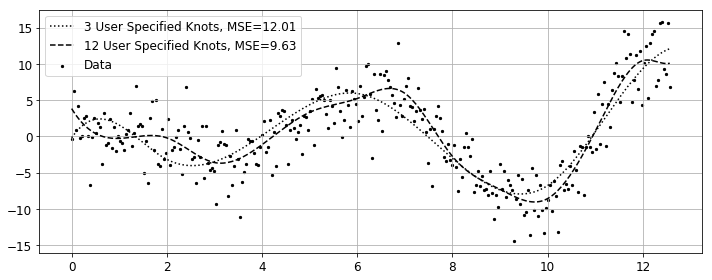

In [7]:
plt.plot(X,fit1(X),ls=":",label="3 User Specified Knots, MSE="+str(round(MSE1,2)),c="k")
plt.plot(X,fit2(X),ls="--",label="12 User Specified Knots, MSE="+str(round(MSE2,2)),c="k")
plt.scatter(X,Y,c="k",s=5,label="Data")

plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
fig.set_size_inches(10,4)
fig.tight_layout()
fig.savefig("smoothing-spline-user-specified-knots.pdf")

# repeat with multiple train/test splits
generate test and training set and fit LSQ Spline to arbitrary knots

In [8]:
def shakeupdata(X,Y, t1, t2):
    n=len(X)
    indices=list(range(n))
#random.seed(999)
    random.shuffle(indices)
    ntrain=round(.75*n)
    ntest=n-ntrain
    training_indices=indices[:ntrain]
    training_indices.sort()
    test_indices=indices[ntrain:]
    test_indices.sort()
    XTRAIN=X[training_indices]
    YTRAIN=Y[training_indices]
    XTEST=X[test_indices]
    YTEST=Y[test_indices]

    ## this line generates a fitting funtions
    fit1=LS(XTRAIN,YTRAIN,t1)
    fit2=LS(XTRAIN,YTRAIN,t2)
    ## this line generates predicted values using the fit functions
    pred1=fit1(XTEST)
    pred2=fit2(XTEST)

    MSE1=sum((pred1-YTEST)**2)/ntest
    MSE2=sum((pred2-YTEST)**2)/ntest
    return(XTRAIN,YTRAIN,XTEST,YTEST,MSE1,MSE2)

In [9]:
p,q,r,s,m1,m2=shakeupdata(X,Y,t1,t2)
len(p),len(q),len(r),len(s)

(225, 225, 75, 75)

skakeupsims runs a single simulation

it returns the mse for one test/train split as a function of split parameter



In [10]:
from math import log
np.logspace(2.5,5,3)

array([   316.22776602,   5623.4132519 , 100000.        ])

In [17]:
def shakeupsim(X,Y,t1,t2):
    XTRAIN,YTRAIN,XTEST,YTEST,MSE1,MSE2=shakeupdata(X,Y, t1, t2)
    svals=np.logspace(2.5,5,100)
    MSES=[]
    for sval in svals:
        s=US(XTRAIN,YTRAIN,s=sval)
        MSE = sum((s(XTEST)-YTEST)**2)/ntest
        MSES.append(MSE)
    return(svals, MSES, MSE1,MSE2)
#
# repeat the fit a bunch (25) of times
#
nshakes=25
MSES=[]
MSE1S=[]
MSE2S=[]
for j in range(nshakes):
    svals,M,MSE1,MSE2=shakeupsim(X,Y,t1,t2)
    MSES.append(M)
    MSE1S.append(MSE1)
    MSE2S.append(MSE2)

#
# find mean and standard deviation of the MSE
# as a function of s parameter
#
MSES = np.array(MSES)
mu=np.mean(MSES,axis=0)
s=np.std(MSES,axis=0)
mu1=np.mean(MSE1S)
mu2=np.mean(MSE2S)
s1=np.std(MSE1S)

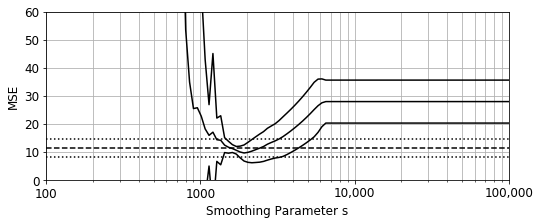

In [19]:
plt.plot(svals,mu,c="k")
plt.plot(svals,mu+1.96*s,c="k")
plt.plot(svals,mu-1.96*s,c="k")
plt.xscale("log")
plt.ylim(0,60)
plt.xlim(100,10**5)
plt.grid(which="both")
plt.plot([100,10**5],[mu1,mu1],c="k",ls="--")
plt.plot([100,10**5],[mu1+1.96*s1,mu1+1.96*s1],c="k",ls=":")
plt.plot([100,10**5],[mu1-1.96*s1,mu1-1.96*s1],c="k",ls=":")
plt.xlabel("Smoothing Parameter s",fontsize=12)
plt.ylabel("MSE",fontsize=12)
plt.xticks([100,1000,10**4,10**5],["100","1000","10,000","100,000"])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
#plt.ylim(0,50)
#plt.yscale("log")
fig.tight_layout()
fig.set_size_inches(8,3)
fig.savefig("Smoothing-parameter-vs-MSE.pdf")

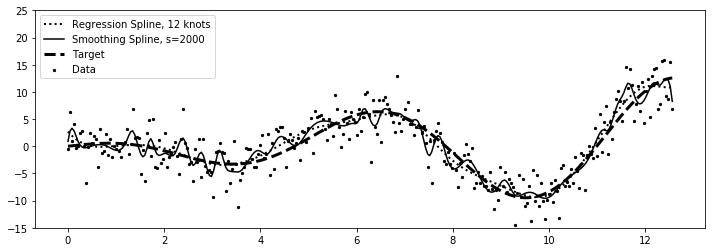

In [20]:
# plt.plot(X,LS(X,Y,t1)(X),c="k",ls="--",lw=.75, label="Regression Spline, 3 knotos")
plt.plot(X,LS(X,Y,t2)(X),c="k",ls=":",lw=2,label="Regression Spline, 12 knots")
plt.plot(X,US(X,Y,s=2000)(X),c="k",label="Smoothing Spline, s=2000")
#plt.plot(X,US(XTRAIN,YTRAIN,s=2000)(X),c="k",ls="-.",label="Smoothing Spline, s=2000")

plt.scatter(X,Y,c="k",s=5,label="Data")
plt.plot(X,X*np.cos(X),lw=3,ls="--",label="Target",c="k")
fig=plt.gcf()
fig.set_size_inches(12,4)
plt.legend(frameon=True,loc="upper left")
plt.ylim(-15,25);

In [21]:
def num_knots(X,Y,spar):
    return len(US(X,Y,s=spar).get_knots())



In [22]:
svals=np.logspace(2.5,4,100)
kvals=[num_knots(X,Y,sval) for sval in svals]

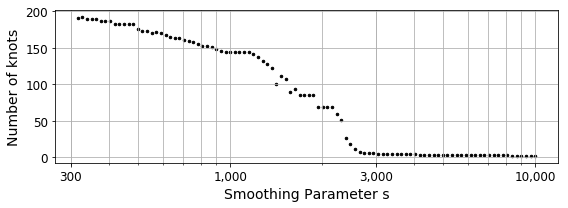

In [24]:
plt.scatter(svals,kvals,c="k",s=25,marker=".")
plt.xscale("log")
fig=plt.gcf()
fig.set_size_inches(8,3)
plt.xticks([300,1000,3000,10000],["300","1,000","3,000","10,000"])
#plt.xticks([10,100,1000,10**4,10**5],["10","100","1000","10,000","100,000"])
#plt.yticks([1,10,100],["1","10","100"])
#plt.ylim([1,300])
#plt.yscale("log")
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.grid(which="both")
plt.xlabel("Smoothing Parameter s",fontsize=14)
plt.ylabel("Number of knots",fontsize=14)
fig.tight_layout()
fig.savefig("spline-knots-vs-s.pdf")

In [25]:

u=US(X,Y,s=n)
u1=US(X,Y,s=5*n)
u2=US(X,Y,s=7*n)
u3=US(X,Y,s=10*n)
u4=US(X,Y,s=30*n)

n0=len(u.get_knots())
n1=len(u1.get_knots())
n2=len(u2.get_knots())
n3=len(u3.get_knots())
n4=len(u4.get_knots())

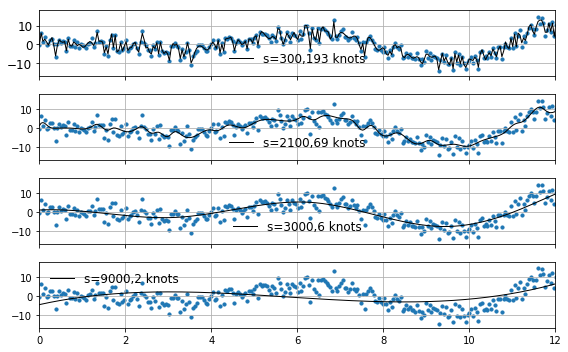

In [33]:
fig,ax=plt.subplots(ncols=1,nrows=4,sharex=True)
ax[0].plot(X,u(X),lw=1,c='k',label="s="+str(n)+","+str(n0)+" knots")
ax[0].legend(frameon=False,fontsize=12)
ax[0].scatter(X,Y,s=10)

#ax[1].plot(X,u1(X),lw=1,c="k",label="s="+str(5*n)+","+str(n1)+" knots")
#ax[1].legend(frameon=False,fontsize=12)
#ax[1].scatter(X,Y,s=10)

ax[1].plot(X,u2(X), lw=1,c="k",label="s="+str(7*n)+","+str(n2)+" knots")
ax[1].legend(frameon=False,fontsize=12)
ax[1].scatter(X,Y,s=10)

ax[2].plot(X,u3(X),lw=1,c="k",label="s="+str(10*n)+","+str(n3)+" knots")
ax[2].scatter(X,Y,s=10)
ax[2].legend(frameon=False,fontsize=12)

ax[3].plot(X,u4(X),lw=1,c="k",label="s="+str(30*n)+","+str(n4)+" knots")
ax[3].scatter(X,Y,s=10)
ax[3].legend(frameon=False,fontsize=12)

plt.xlim([0,12])
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 12)

for a in ax:
    a.grid()

#plt.scatter(X,Y)
#fig=plt.gcf()
fig.set_size_inches(8,5)
fig.tight_layout()
fig.savefig("spline-fits-various-parameters.pdf")
